# Finding the roots of an equation

## Motivation

We will find equations everywhere, and most of the time solving them will imply finding their roots:

$$f(x) = 0 $$

We will need approximate, numerical, methods when their roots are not analytically accessible. Consider, for example:

$$f(x) = e^{-x} -x$$

# The Bisection Method

Based on Bolzano's theorem. It is an example of a **bracketing** method.


1. Choose $x_l$ and $x_u$ such that $f(x_l)f(x_u) < 0$
2. Estimate the root $x* = \frac{x_l+x_u}{2}$
3. Determine where the root lies:
    1. If $f(x^∗) = 0$, then the root is $x^*$. Exit the computation.
    2. If $f(x_l)f(x_*) < 0$, then the root lies in the first subinterval. 
    3. If $f(x_*)f(x_u) < 0$, then the root lies in the second subinterval. 
    
Repeat until we find the root, until we reach a maximum number of iterations, or until we satisfy a convergence criterion, such as $ε_a < ε_s$.

#### Example

The falling parachutist as a function of drag coefficient, $c$:


$$f(c) = \frac{g\cdot m}{c} \{1 - e^{-t(c/m)}\}-v$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
def function(c):
    m = 68.1 
    v = 40
    t = 10
    g = 9.81
    
    return ((g * m) / c) * (1 - np.exp(-t * (c / m))) - v

The function looks like this:

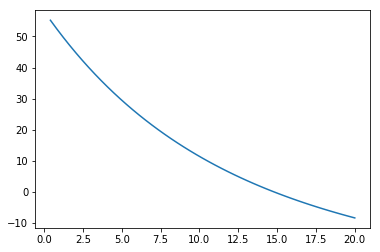

In [2]:
cs = np.linspace(0, 20)
fs = function(cs)
plt.plot(cs, fs);

We can apply the algorithm manually, step by step:

In [3]:
function(12), function(16)

(6.113943075921462, -2.230260706051183)

In [4]:
function(14), function(16)

(1.6111163549207461, -2.230260706051183)

In [5]:
function(14), function(15)

(1.6111163549207461, -0.38445806069939437)

In [6]:
function(14.5), function(15)

(0.5936984488141874, -0.38445806069939437)

In [7]:
function(14.75), function(14.875)

(0.09982999167534246, -0.143497243851904)

In [8]:
function(14.75), function(14.8125)

(0.09982999167534246, -0.02213120606264596)

In [9]:
function(14.78125), function(14.8125)

(0.03877477430228282, -0.02213120606264596)

At this point, we now it's somewhere around 14.8. Wouldn't it be better to automate this procedure?

We can write a function that uses functions as input. For example, the same way we plotted earlier, we can write a function that takes any function and plots it:

In [10]:
def plot(f, left=0, right=20):
    cs = np.linspace(left, right)
    fs = f(cs)
    plt.plot(cs, fs)
    # Plot a black line at y=0
    plt.plot(cs, [0] * len(cs), c='grey')


Now we use our `plot()` function to plot different functions, either the ones that we already have or an anonimous one. Our `plot()` function is a _higher order function_.

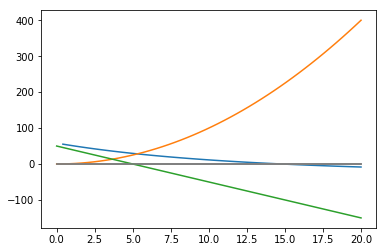

In [11]:
def square(x):
    return x * x

plot(function)
plot(square)
plot(lambda x: -10 * x + 50)

#### Exercise

Write a function that performs the bisection method on any given function f. It will take a function as input, like the `plot()` function does.

In [12]:
def bisect(f):
    'Find a root of f within the interval [xl, xu]'
    
    iteration = 0
    max_iterations = 100
    xl = 12
    xu = 16
    es = 0.0005
    ea = 1

    if f(xl) * f(xu) > 0:
        raise ValueError("No change of sign in the interval")
        
    
    while abs(ea) > es and iteration < max_iterations:
        root = (xl + xu) / 2

        if f(root) == 0:
            ea = 0
            break
        elif f(xl) * f(root) < 0:
            ea = (xu - root) / xu
            xu = root
        elif f(xu) * f(root) < 0:
            ea = (xl - root) / xl
            xl = root
    
        iteration += 1
    
    return root


bisect(function)

14.80078125

Check out what happens if we try to apply our solver to another function which does not have a root in the interval:

In [13]:
def parabolic(x):
    return 2 * x * x - 20

bisect(parabolic)

ValueError: No change of sign in the interval

It's much better to extract those default values to optional arguments, so that we allow the user to modify them if needed:

In [14]:
def bisectv2(f, xl=12, xu=16, es=0.0005, max_iterations=100):
    'Find a root of f within the interval [xl, xu]'
    
    if f(xl) * f(xu) > 0:
        raise ValueError("No change of sign in the interval")
        
    iteration = 0
    ea = 1
    
    while abs(ea) > es and iteration < max_iterations:
        root = (xl + xu) / 2

        if f(root) == 0:
            ea = 0
            break
        elif f(xl) * f(root) < 0:
            ea = (xu - root) / xu
            xu = root
        elif f(xu) * f(root) < 0:
            ea = (xl - root) / xl
            xl = root
        

        iteration += 1
    
    return root


bisectv2(function)

14.80078125

We can use non-default values by name:

In [15]:
bisectv2(parabolic, xl=-2, xu=5)

3.1619873046875

Or by position:

In [16]:
bisectv2(parabolic, -2, 5)

3.1619873046875

# The Newton-Raphson method

Based on 

$$f'(x_i) = \frac{f(x_i) - 0}{x_i - x_{i+1}}$$

Therefore:

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

It is an example of an **open** method.

Graphically:

![Newton-Raphson method](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

#### Example

Use the Newton-Raphson method to estimate the root of $f(x) = e^{-x} - x$.

In [17]:
def f(x):
    return np.e ** -x - x
    
def f_prime(x):
    return - np.e ** -x - 1

x_0 = 0

In [18]:
x_1 = x_0 - (f(x_0) / f_prime(x_0))
x_0 = x_1
x_1

0.5

In [19]:
x_1 = x_0 - (f(x_0) / f_prime(x_0))
x_0 = x_1
x_1

0.5663110031972182

In [20]:
x_1 = x_0 - (f(x_0) / f_prime(x_0))
x_0 = x_1
x_1

0.5671431650348623

In [21]:
np.exp(-x_1)

0.5671433615153338

#### Exercise 

Write a function that performs the Newton-Raphson method on any given function, f.



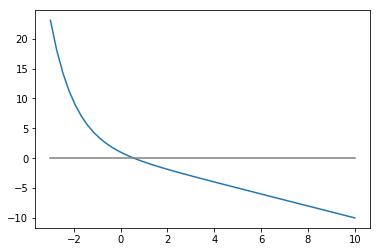

In [22]:
def e_minusx(x):
    return np.exp(-x) - x

def e_minusx_prime(x): 
    return - np.exp(-x) - 1

plot(e_minusx, -3, 10)

In [23]:
def newton_raphson(f, fprime, x0=1, es=0.0005, max_iterations=100):
    
    ea=1
    iteration=0
    
    while abs(ea) > es and iteration < max_iterations:
        x1 = x0 - f(x0) / fprime(x0)
        ea = (x1 - x0) / x1
        x0 = x1
        iteration += 1
    
    return x0
    
newton_raphson(e_minusx, e_minusx_prime)

0.567143285989123

Check out how we can apply it to anything:

In [24]:
def xtimes4(x): return 4 * x

newton_raphson(parabolic, xtimes4)

3.162277665175675

In [25]:
newton_raphson(parabolic, lambda x: 4 * x)

3.162277665175675

## Convergence rate

In order to compare convergence rate with the bisection method, we are going to write two versions that return the history of approximation in addition to the final estimate.

In [26]:
def bisect_history(f, xl=12, xu=16, es=0.0005, max_iterations=100):
    iteration = 0
    ea = 1
    history = []
    
    while abs(ea) > es and iteration < max_iterations:
        root = (xl + xu) / 2
        history.append(root)

        if f(root) == 0:
            ea = 0
            break
        elif f(xl) * f(root) < 0:
            ea = (xu - root) / xu
            xu = root
        elif f(xu) * f(root) < 0:
            ea = (xl - root) / xl
            xl = root
        

        iteration += 1
    
    return root, history


def newton_raphson_history(f, fprime, x0=1, es=0.0005, max_iterations=100):
    
    ea=1
    iteration=0
    history = []

    while abs(ea) > es and iteration < max_iterations:
        x1 = x0 - f(x0) / fprime(x0)
        history.append(x1)
        ea = (x1 - x0) / x1
        x0 = x1
        iteration += 1
    
    return x0, history
    
newton_raphson_history(e_minusx, e_minusx_prime)

(0.567143285989123,
 [0.5378828427399902, 0.5669869914054133, 0.567143285989123])

In [27]:
bisect_history(e_minusx, xl=0.5, xu=2)

(0.56719970703125,
 [1.25,
  0.875,
  0.6875,
  0.59375,
  0.546875,
  0.5703125,
  0.55859375,
  0.564453125,
  0.5673828125,
  0.56591796875,
  0.566650390625,
  0.5670166015625,
  0.56719970703125])

## Pitfalls

* Multiple roots
* $f-(x_i)$ very close to 0
* $f$ has an inflection point very close to the root.
* Shape of $f$ might make it very sensitive to initial values.

#### Example

Use the Newton-Raphson function we wrote earlier to find a root of $f(x) = sin(x)$

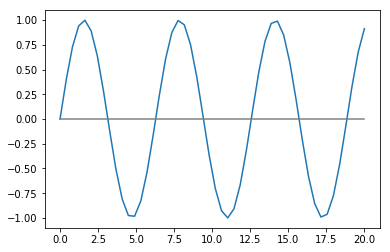

In [28]:
plot(np.sin)

If we apply N-R to this function, depending on the initial value, it might take a while to converge because it jumps around.

In [29]:
root, history = newton_raphson_history(np.sin, np.cos, 7.5)
history

[4.793986133227309,
 17.022104570959424,
 13.211753675595238,
 12.45880896507305,
 12.566787354860113,
 12.566370614335048]

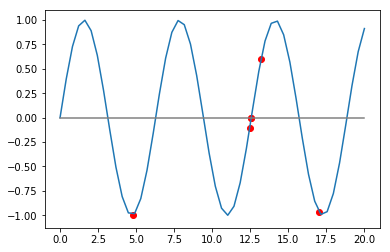

In [30]:
plot(np.sin)
plt.scatter(history, np.sin(history), c='Red');

# Roots of polynomials

$$f(x) = a_0 + a_1 x + a_2 x^2 + \ldots + a_n x^n$$ .

1. An $n$th order equation will have $n$ roots, not necessarily different.
2. If n is odd, there is at least one real root.
3. If there are any complex roots, they come in conjugate pairs: $\lambda + \mu i$, $\lambda - \mu i$

Newton-Raphson can be used to find roots of polynomials but it might be susceptible to convergence problems. For that reason, methods specific to the roots of polynomials have been developed, like Müller's and Bairstow's.

## Deflation 

Deflation is the process of eliminating already found roots of polynomials in order not to find them again. We just do this by dividing by $(x-r)$.


## Root polishing

Consists of taking the solutions found during deflation as initial estimates, and then going back to the original polynomial and determining each again.

We might have problems if there are two or more roots that are so close that they converge on the same undeflated root.

## `polyroot`

See [numpy polyroot](https://docs.scipy.org/doc/numpy-1.15.4/reference/generated/numpy.polynomial.polynomial.polyroots.html) for more details.


In [31]:
from numpy.polynomial import polynomial as poly

help(poly.polyroots)

Help on function polyroots in module numpy.polynomial.polynomial:

polyroots(c)
    Compute the roots of a polynomial.
    
    Return the roots (a.k.a. "zeros") of the polynomial
    
    .. math:: p(x) = \sum_i c[i] * x^i.
    
    Parameters
    ----------
    c : 1-D array_like
        1-D array of polynomial coefficients.
    
    Returns
    -------
    out : ndarray
        Array of the roots of the polynomial. If all the roots are real,
        then `out` is also real, otherwise it is complex.
    
    See Also
    --------
    chebroots
    
    Notes
    -----
    The root estimates are obtained as the eigenvalues of the companion
    matrix, Roots far from the origin of the complex plane may have large
    errors due to the numerical instability of the power series for such
    values. Roots with multiplicity greater than 1 will also show larger
    errors as the value of the series near such points is relatively
    insensitive to errors in the roots. Isolated roots near th

In [32]:
poly.polyroots([1, 0, -4])

array([-0.5,  0.5])

In [33]:
poly.polyroots([-4, 0, 1])

array([-2.,  2.])

# Problems

#### Exercise

Use Newton-Raphson to find the positive real root of

$$f(x) = x^3 + x^2 -4x -4$$

Plot the functions, and compare the roots to those returned by polyroot.

#### Exercise

Remember that the velocity v of a falling parachutist is given by

$$v = \frac{gm}{c} (1 - e^{-(c/m)t})$$

where $g = 9.8 m/s^2$. For a parachutist with a drag coefficient $c = 15 kg/s$, compute the mass $m$ so that velocity is $v = 35 m/s$ at $t = 9s$. Use any method to determine m to a level of $\epsilon_s = 0.1%$.

#### Exercise

Use bisection to determine the drag coefficient needed so that an 80-kg parachutist has a velocity of 36 m/s after 4 s of free fall. Start with initial guesses of $x_l = 0.1$ and $x_u = 0.2$ and iterate until the approximate relative error falls below 2%.

#### Exercise

Determine the lowest real root of f(x) = –12 − 21x + 18x 2 − 2.4x 3:

* Graphically 
* Using Newton-Raphson to a value of $\epsilon_s$ corresponding to three significant figures.

# Further Reading
[Muller's method]

[Bairstow's method]

[Muller's method]: https://en.wikipedia.org/wiki/Muller%27s_method
[Bairstow's method]: https://en.wikipedia.org/wiki/Bairstow%27s_method